In [ ]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys

In [ ]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
pip install ipython

In [ ]:
import IPython.display as ipd

In [ ]:
from IPython.display import Audio

In [ ]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
RavdessData = r"C:\Users\anush\Desktop\ML Workspace\Audio\\"

In [ ]:
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []
for dir in ravdessDirectoryList:
    actor = os.listdir(RavdessData + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData + dir + '/' + file)
emotion_df = pd.DataFrame(fileEmotion, columns = ['Emotions'])
path_df = pd.DataFrame(filePath, columns = ['Path'])
Ravdess_df = pd.concat([emotion_df,path_df], axis=1)

In [ ]:
Ravdess_df.Emotions.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust',8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
1,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
2,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
3,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
4,calm,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...


In [ ]:
dataPath = pd.concat([Ravdess_df],axis=0)
dataPath.to_csv("data_path.csv",index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
1,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
2,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
3,neutral,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...
4,calm,C:\Users\anush\Desktop\ML Workspace\Audio\\Act...


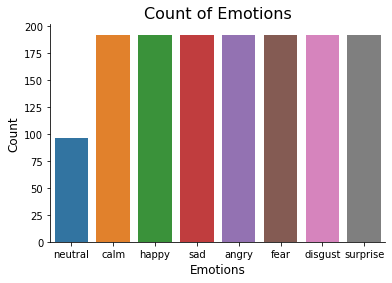

In [ ]:
mplt.title('Count of Emotions', size=16)
sbn.countplot(dataPath.Emotions)
mplt.ylabel('Count',size=12)
mplt.xlabel('Emotions',size=12)
sbn.despine(top=True, right=True, left=False, bottom=False)
mplt.show()

In [ ]:
def createWaveplot(data,sr,e):
    mplt.figure(figsize=(10,3))
    mplt.title('Waveplot for audio with {} emotion'.format(e),size=15)
    librosa.display.waveshow(data,sr=sr)
    mplt.show()

In [ ]:
def createSpectogram(data,sr,e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12,3))
    mplt.title('Spectogram for audio with {} emotion'.format(e),size=15)
    librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
    mplt.colorbar()

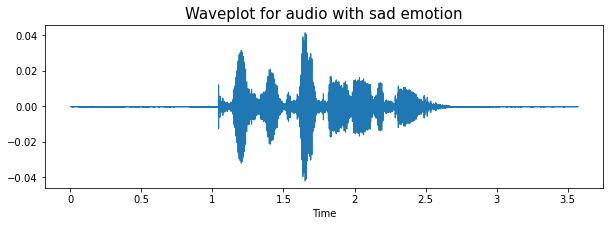

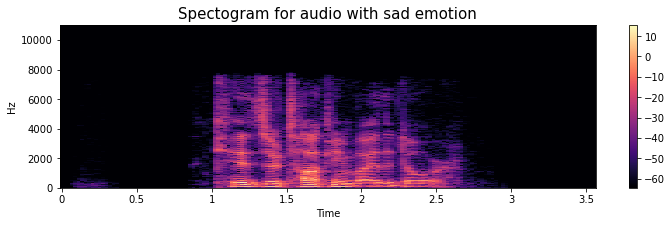

In [ ]:
emotion='sad'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

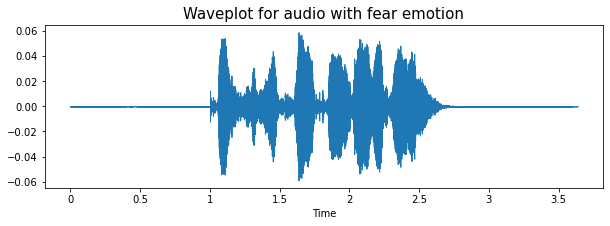

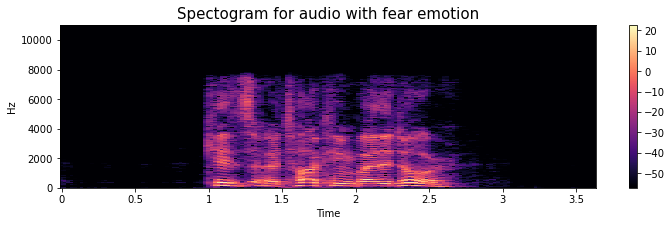

In [ ]:
emotion='fear'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

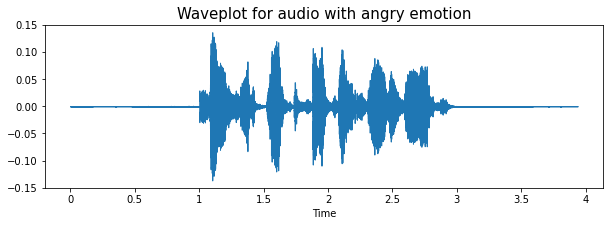

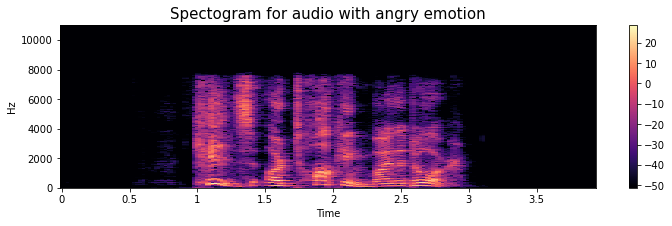

In [ ]:
emotion='angry'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

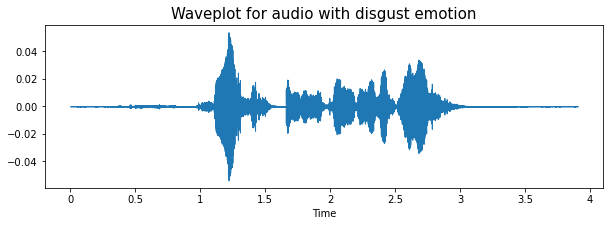

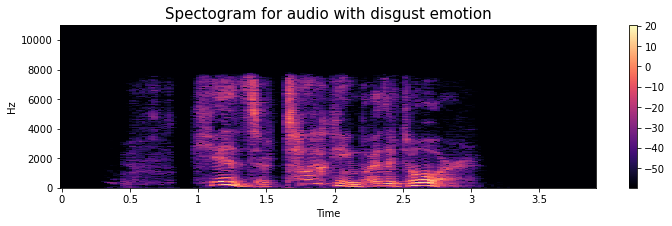

In [ ]:
emotion='disgust'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

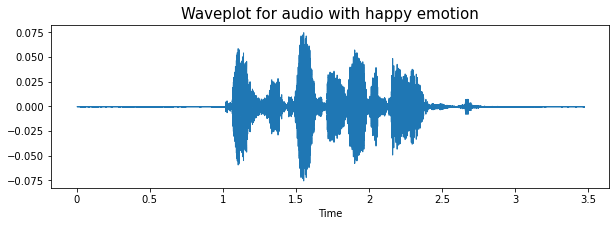

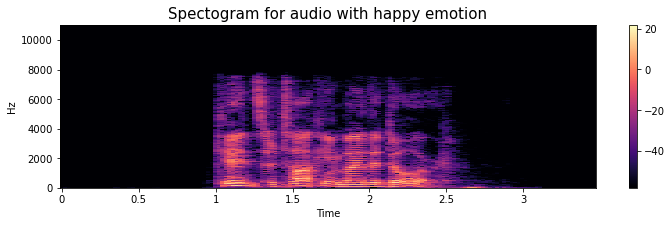

In [ ]:
emotion='happy'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

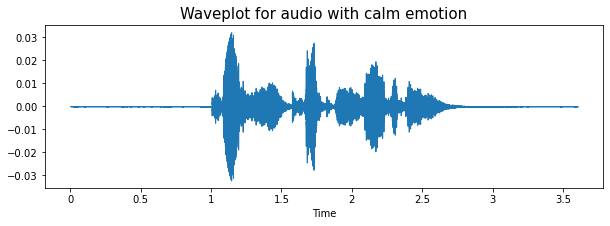

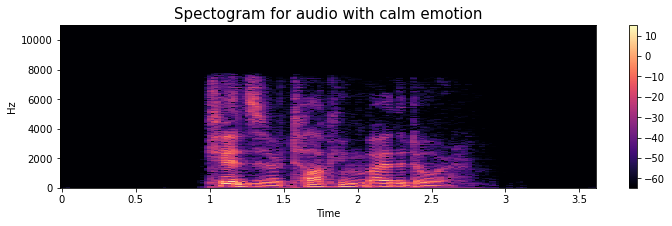

In [ ]:
emotion='calm'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

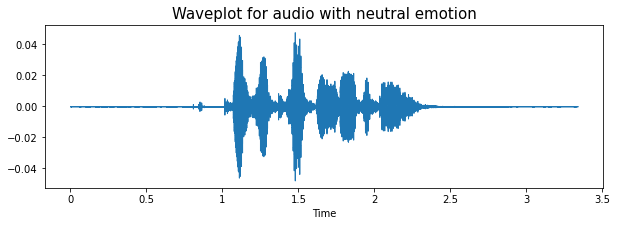

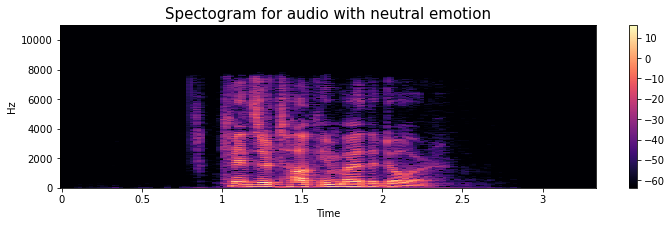

In [ ]:
emotion='neutral'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

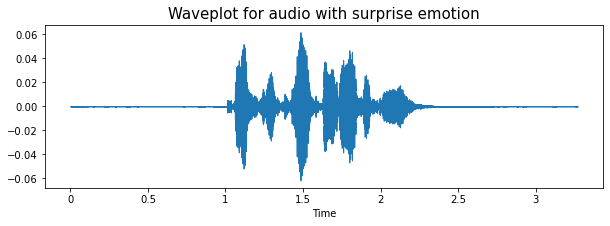

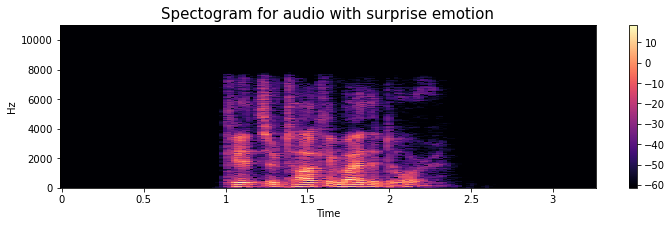

In [ ]:
emotion='surprise'
path = np.array(dataPath.Path[dataPath.Emotions ==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectogram(data, samplingRate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noiseAmp = 0.035*np.random.uniform()*np.amax(data)
    data=data+noiseAmp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shiftRange=int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shiftRange)

def pitch(data, samplingRate, pitchFactor = 0.7):
    return librosa.effects.pitch_shift(data,samplingRate, pitchFactor)


In [ ]:
path = np.array(dataPath.Path)[1]
data.sampleRate = librosa.load(path)

AttributeError: 'numpy.ndarray' object has no attribute 'sampleRate'

In [ ]:
x = noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

NameError: name 'sampleRate' is not defined

<Figure size 1008x288 with 0 Axes>